In [79]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [80]:
data_train = pd.read_csv("train_1a.csv")
data_test = pd.read_csv("test.csv")
data_validation = pd.read_csv("validation.csv")

display(data_train.shape)
display(data_test.shape)
display(data_validation.shape)

(10, 2)

(25, 2)

(25, 2)

In [81]:
data_train.head()

,X,y
0,0.681757,-0.790562
1,-0.967766,-4.726091
2,-0.467406,-1.127682
3,0.986630,-0.736240
4,0.944601,-1.343156


In [82]:
t_train = data_train["y"]
t_test = data_test["y"]
t_validation = data_validation["y"]
t_train = t_train.values
t_test = t_test.values
t_validation = t_validation.values

In [83]:
x_train = data_train.drop("y", axis=1)
x_test = data_test.drop("y", axis=1)
x_validation = data_validation.drop("y", axis=1)
x_train = x_train.values
x_test = x_test.values
x_validation = x_validation.values

In [84]:
def generate_polynomial_basis(M):
    basis_functions = []
    for degree in range(M + 1):
        for exponents in itertools.product(range(degree + 1), repeat=len(x_train[0])):
            if sum(exponents) == degree:
                basis_functions.append(exponents)

    return basis_functions

In [85]:
def generate_design_matrix(X, basis_functions):
    n_samples, n_variables = X.shape

    # Initialize the design matrix
    design_matrix = np.ones((n_samples, len(basis_functions)))

    # Populate the design matrix
    for i, exponents in enumerate(basis_functions):
        term = np.prod([X[:, j]**exponents[j] for j in range(n_variables)], axis=0)
        design_matrix[:, i] = term

    return design_matrix

In [86]:
def estimate_parameters(Phi, t, λ):
    d = Phi.shape[1]
    I = np.eye(d)
    # Estimate the coefficients using: (Phi.T * Phi)^-1 * Phi.T * y
    x = np.linalg.inv((Phi.T @ Phi) + λ*I)  # Inverse of Phi^T * X
    y = Phi.T @ t  # Phi^T * t
    w = x @ y  # (Phi^T * Phi)^-1 * Phi^T * t

    return w

In [87]:
t_train.shape

(10,)

In [88]:
def fit(x_train, t_train, M, λ=0):
  basis_functions = generate_polynomial_basis(M)
  Phi = generate_design_matrix(x_train, basis_functions)
  w = estimate_parameters(Phi, t_train, λ)
  return Phi, w

In [89]:
def predict(X, w, M):
    X = np.asarray(X)
    basis_functions = generate_polynomial_basis(M)
    X_design = generate_design_matrix(X, basis_functions)
    y_pred = X_design @ w
    return y_pred

In [90]:
def Erms(y, t):
    return np.sqrt(sum((y - t)**2) / len(t))

In [91]:
from sklearn.metrics import r2_score

def calculate_accuracy(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [92]:
def plot_predict_actual(y, t, M, λ=0):
  # Plotting actual vs predicted values
  plt.figure(figsize=(5, 3))
  plt.scatter(t, y, color='blue', label='Predicted vs Actual')

  # Plotting a diagonal line for reference (perfect prediction line)
  plt.plot([min(t), max(t)], [min(t), max(t)], color='red', linestyle='--', label='Perfect Prediction')

  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(f'Predicted vs Actual Values for Degree={M}, λ={λ}')
  plt.legend()
  plt.show()

In [93]:
def plot_curve(w, M):
  x_plot = np.linspace(min(np.concatenate((x_train, x_validation, x_test))),
                      max(np.concatenate((x_train, x_validation, x_test))), 100)
  y_plot = predict(x_plot, w, M)

  # Plotting actual vs predicted values
  plt.figure(figsize=(10, 6))
  plt.scatter(x_train, t_train, color='red', label='Train Data')
  plt.scatter(x_test, t_test, color='blue', label='Test Data')
  plt.scatter(x_validation, t_validation, color='black', label='Validation Data')
  plt.plot(x_plot, y_plot, color='green', label='Curvfitting Without Regularizer')

  # plt.xlim(min(x_train)-0.2, max(x_train)+0.2)  # x-axis limits from 0 to 6
  # plt.ylim(min(t_train)-1, max(t_train)+1)  # y-axis limits from 0 to 30

  plt.xlabel('X Data')
  plt.ylabel('Y Output')
  plt.title(f'Polynomial Curve Fitting for Dataset 1 Degree={M}')
  plt.legend()
  plt.show()


Degree = 3: Train Data Erms = 0.24364226838033295, Train Data Accuracy = 0.9644659719027282
Degree = 3: Test Data Erms = 0.5021674919676101, Test Data Accuracy = 0.6850540237161723
Degree = 6: Train Data Erms = 0.1974110351259329, Train Data Accuracy = 0.9766717573293986
Degree = 6: Test Data Erms = 0.42895614455464837, Test Data Accuracy = 0.7701922553351581
Degree = 9: Train Data Erms = 4.066141008848046e-06, Train Data Accuracy = 0.999999999990103
Degree = 9: Test Data Erms = 141.01847596238414, Test Data Accuracy = -24835.529359341275


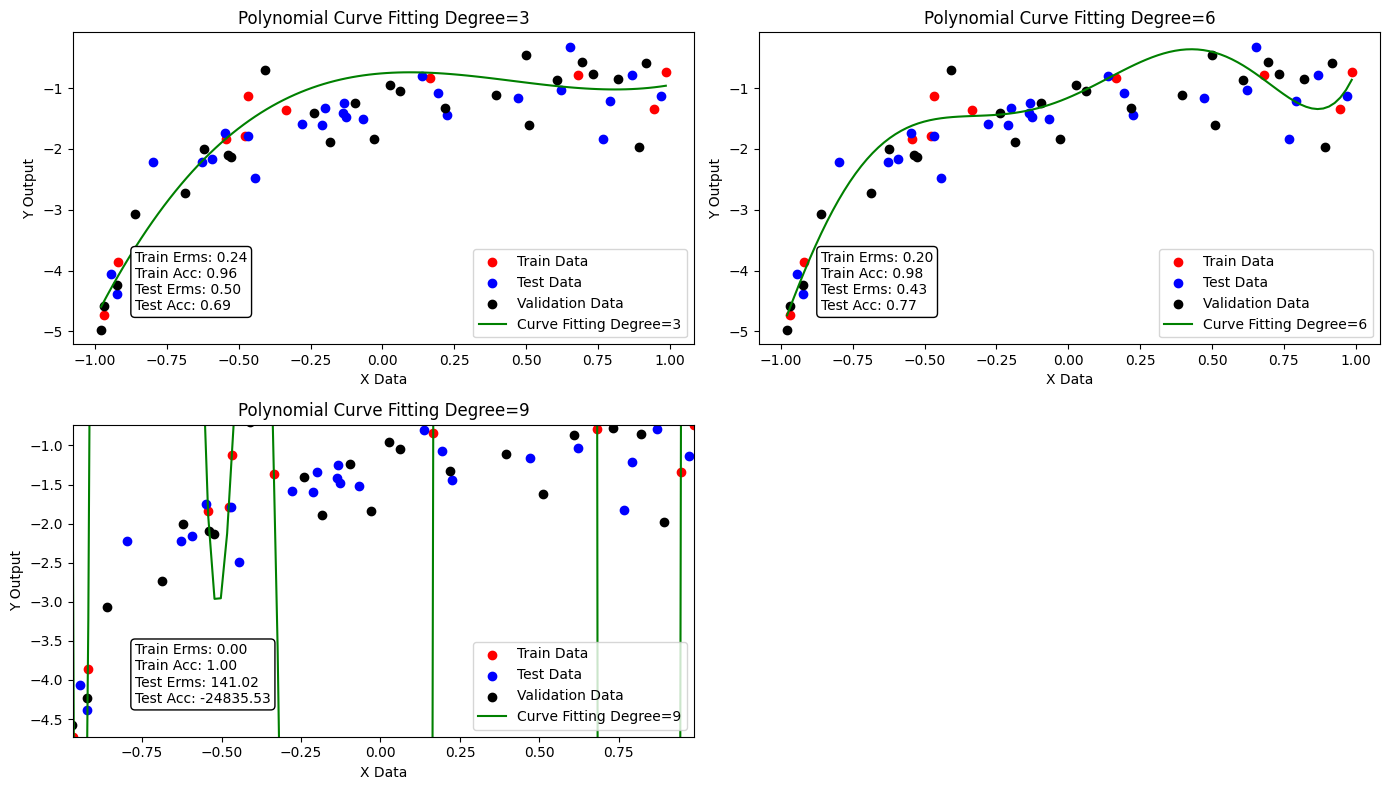

In [94]:
M_values = [3, 6, 9]

n_cols = 2
n_rows = (len(M_values) + n_cols - 1) // n_cols  # This will give you the ceiling of len(M_values) / n_cols

# Setting up the plot with two columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

for i, M in enumerate(M_values):
    # Train the model
    Phi, w = fit(x_train, t_train, M)

    # Model Performance analysis on Train data
    y_train = predict(x_train, w, M)
    accuracy_train = calculate_accuracy(t_train, y_train)
    Erms_train = Erms(y_train, t_train)

    # Model Performance analysis on Test data
    y_test = predict(x_test, w, M)
    accuracy_test = calculate_accuracy(t_test, y_test)
    Erms_test = Erms(y_test, t_test)

    print(f"Degree = {M}: Train Data Erms = {Erms_train}, Train Data Accuracy = {accuracy_train}")
    print(f"Degree = {M}: Test Data Erms = {Erms_test}, Test Data Accuracy = {accuracy_test}")

    x_plot = np.linspace(min(np.concatenate((x_train, x_validation, x_test))),
                         max(np.concatenate((x_train, x_validation, x_test))), 100)
    y_plot = predict(x_plot, w, M)

    # Plotting actual vs predicted values
    axes[i].scatter(x_train, t_train, color='red', label='Train Data')
    axes[i].scatter(x_test, t_test, color='blue', label='Test Data')
    axes[i].scatter(x_validation, t_validation, color='black', label='Validation Data')
    axes[i].plot(x_plot, y_plot, color='green', label=f'Curve Fitting Degree={M}')

    # Adding Erms and accuracy as text on the plot
    text_str = f"Train Erms: {Erms_train:.2f}\nTrain Acc: {accuracy_train:.2f}\n" \
               f"Test Erms: {Erms_test:.2f}\nTest Acc: {accuracy_test:.2f}"
    axes[i].text(0.1, 0.3, text_str, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

    axes[i].set_xlabel('X Data')
    axes[i].set_ylabel('Y Output')
    axes[i].set_title(f'Polynomial Curve Fitting Degree={M}')
    axes[i].legend()

# Hide any unused subplots
for j in range(len(M_values), len(axes)):
    fig.delaxes(axes[j])

plt.xlim(min(x_train), max(x_train))
plt.ylim(min(t_train), max(t_train))

plt.tight_layout()
plt.show()


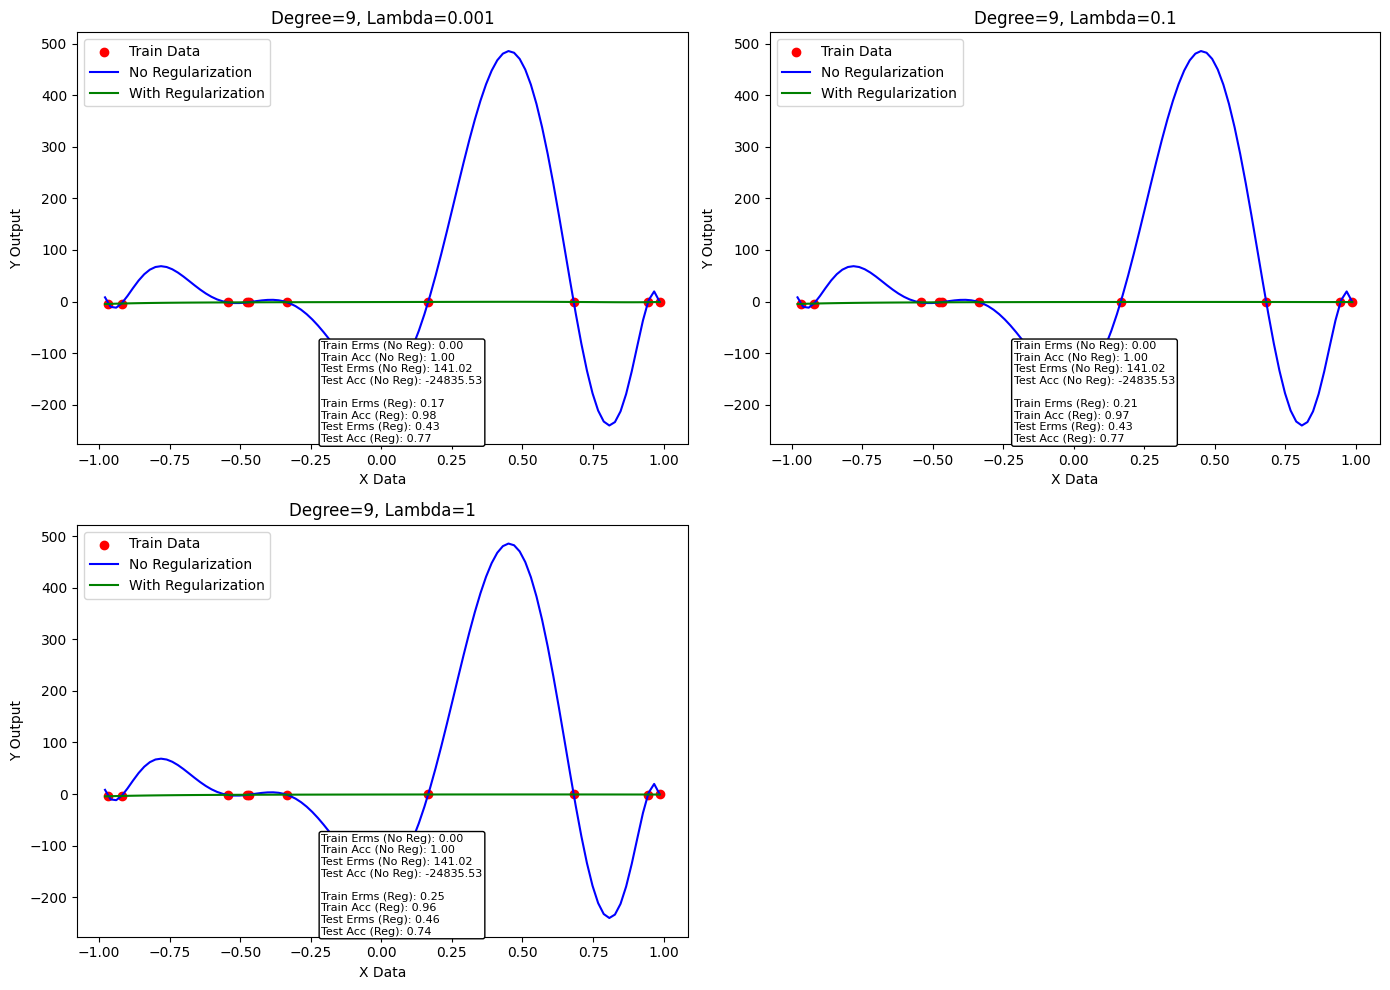

In [97]:
M = 9
λ_values = [0.001, 0.1, 1]

n_cols = 2
n_rows = (len(λ_values) + n_cols - 1) // n_cols  # This will give you the ceiling of len(M_values) / n_cols

# Setting up the plot with two columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
axes = axes.flatten()

for i, λ in enumerate(λ_values):
    # Train the model without and with regularization
    Phi, w = fit(x_train, t_train, M)
    Phi_with_Reg, w_with_reg = fit(x_train, t_train, M, λ)

    # Model Performance analysis on Train and Test data without Regularization
    y_train = predict(x_train, w, M)
    accuracy_train = calculate_accuracy(t_train, y_train)
    Erms_train = Erms(y_train, t_train)

    y_test = predict(x_test, w, M)
    accuracy_test = calculate_accuracy(t_test, y_test)
    Erms_test = Erms(y_test, t_test)

    # Model Performance analysis on Train and Test data with Regularization
    y_train_with_reg = predict(x_train, w_with_reg, M)
    accuracy_train_with_reg = calculate_accuracy(t_train, y_train_with_reg)
    Erms_train_with_reg = Erms(y_train_with_reg, t_train)

    y_test_with_reg = predict(x_test, w_with_reg, M)
    accuracy_test_with_reg = calculate_accuracy(t_test, y_test_with_reg)
    Erms_test_with_reg = Erms(y_test_with_reg, t_test)

    # Generate plots
    x_plot = np.linspace(min(np.concatenate((x_train, x_validation, x_test))),
                         max(np.concatenate((x_train, x_validation, x_test))), 100)
    y_plot = predict(x_plot, w, M)
    y_plot_with_reg = predict(x_plot, w_with_reg, M)

    # Plotting actual vs predicted values
    axes[i].scatter(x_train, t_train, color='red', label='Train Data')
    axes[i].plot(x_plot, y_plot, color='blue', label=f'No Regularization')
    axes[i].plot(x_plot, y_plot_with_reg, color='green', label=f'With Regularization')

    plt.xlim(min(x_train), max(x_train))
    plt.ylim(min(t_train), max(t_train))

    # Adding Erms and accuracy as text on the plot
    text_str = (
        f"Train Erms (No Reg): {Erms_train:.2f}\n"
        f"Train Acc (No Reg): {accuracy_train:.2f}\n"
        f"Test Erms (No Reg): {Erms_test:.2f}\n"
        f"Test Acc (No Reg): {accuracy_test:.2f}\n\n"
        f"Train Erms (Reg): {Erms_train_with_reg:.2f}\n"
        f"Train Acc (Reg): {accuracy_train_with_reg:.2f}\n"
        f"Test Erms (Reg): {Erms_test_with_reg:.2f}\n"
        f"Test Acc (Reg): {accuracy_test_with_reg:.2f}"
    )
    axes[i].text(0.4, 0.25, text_str, transform=axes[i].transAxes, fontsize=8,
                 verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", edgecolor="black", facecolor="white"))

    axes[i].set_xlabel('X Data')
    axes[i].set_ylabel('Y Output')
    axes[i].set_title(f'Degree={M}, Lambda={λ}')
    axes[i].legend()

# Hide any unused subplots
for j in range(len(M_values), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Train Data Erms: 0.22005116730450944
Train Data Accuracy: 0.9710141175711031
Test Data Erms: 0.43787220934229276
Test Data Accuracy: 0.7605396355815213
Validation Data Erms: 0.45994552577173464
Validation Data Accuracy: 0.8599747819206527
Train Data:


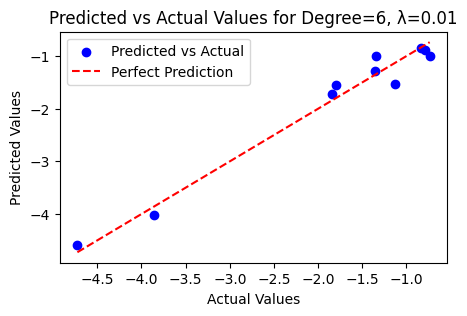

Test Data:


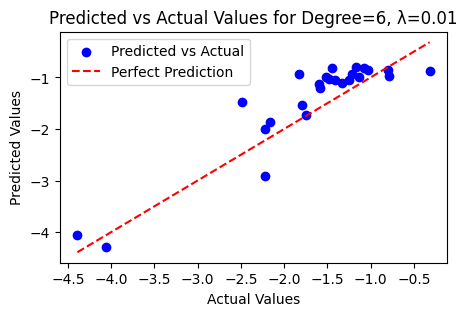

Validation Data:


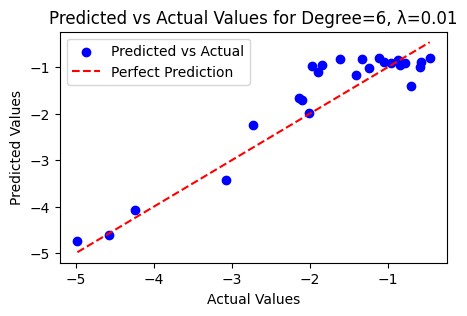

In [96]:
#Hyperparameter
#Highest Degree
M=6
λ=0.01

#Train The Model
Phi, w = fit(x_train, t_train, M, λ)


#Model Performance analysis on Train data
y_train = predict(x_train, w, M)
accuracy_train=calculate_accuracy(t_train, y_train)
Erms_train = Erms(y_train, t_train)

print(f"Train Data Erms: {Erms_train}")
print(f"Train Data Accuracy: {accuracy_train}")


#Model Performance analysis on Test data
y_test = predict(x_test, w, M)
accuracy_test=calculate_accuracy(t_test, y_test)
Erms_test = Erms(y_test, t_test)

print(f"Test Data Erms: {Erms_test}")
print(f"Test Data Accuracy: {accuracy_test}")


#Model Performance analysis on Validation data
y_validation = predict(x_validation, w, M)
accuracy_validation=calculate_accuracy(t_validation, y_validation)
Erms_validation = Erms(y_validation, t_validation)

print(f"Validation Data Erms: {Erms_validation}")
print(f"Validation Data Accuracy: {accuracy_validation}")

#Visualization of Model

print("Train Data:")
plot_predict_actual(y_train, t_train, M, λ)

print("Test Data:")
plot_predict_actual(y_test, t_test, M, λ)

print("Validation Data:")
plot_predict_actual(y_validation, t_validation, M, λ)